<a href="https://colab.research.google.com/github/kganesh1999/5292353_CAP5610_Assignment/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#Import Libraries
import numpy as np
import pandas as pd
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

#Train Data Preprocessing 

In [115]:
#Dropping unwanted features
titanic_train.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [116]:
#Convert sex into binary variable (Male = 0 and Female =1)
bin = pd.get_dummies(titanic_train['Sex'])
titanic_train = pd.concat((bin,titanic_train),axis=1)
titanic_train.drop(['Sex','male'],axis=1,inplace=True)
titanic_train = titanic_train.rename(columns={"female":"Sex"})
titanic_train.head()

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C
2,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S
4,0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S


In [117]:
#Filling missing values in Age feature 
mean=titanic_train['Age'].mean()
std=titanic_train['Age'].std()
titanic_train['Age'] = titanic_train['Age'].fillna(value=np.random.randint(mean-std, mean+std))
titanic_train['Age'].isna().sum()

0

In [118]:
#Filling missing values in Embarked feature
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)
titanic_train['Embarked'].isna().sum()

0

In [119]:
#Conversion of Numerical values in Fare column to ordinal values
def mask(data):
  if ((data >= -1.00) & (data <= 7.91)):
    return int(0)
  elif ((data > 7.91) & (data <= 14.454)):
    return int(1)
  elif ((data > 14.454) & (data <= 31.0)):
    return int(2)
  elif (data > 31.0):
    return int(3)
titanic_train['Fare'] = titanic_train['Fare'].apply(mask)

In [120]:
#Encoding Embarked values (S=1, C=2, Q=3)
encode_emb={'Embarked' : {"S":1,"C":2,"Q":3}}
titanic_train = titanic_train.replace(encode_emb)

In [121]:
#Create another feature 'IsAlone'
def boolean(data):
  if (data==0):
    return 1
  else:
    return 0
titanic_train['IsAlone'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train['IsAlone'] = titanic_train['IsAlone'].apply(boolean)

In [122]:
#Drop PassengerID and Name
titanic_train.drop(['PassengerId','Name'],axis=1,inplace=True)

In [123]:
titanic_train.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,0,3,22.0,1,0,0,1,0
1,1,1,1,38.0,1,0,3,2,0
2,1,1,3,26.0,0,0,1,1,1
3,1,1,1,35.0,1,0,3,1,0
4,0,0,3,35.0,0,0,1,1,1


In [124]:
titanic_train.isna().sum()

Sex         0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

# Test Data Preprocessing


In [125]:
#Dropping unwanted features
titanic_test.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [126]:
#Convert sex into binary variable (Male = 0 and Female =1)
bin = pd.get_dummies(titanic_test['Sex'])
titanic_test = pd.concat((bin,titanic_test),axis=1)
titanic_test.drop(['Sex','male'],axis=1,inplace=True)
titanic_test = titanic_test.rename(columns={"female":"Sex"})

In [127]:
#Filling missing values in Fare feature
titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0],inplace=True)
titanic_test['Fare'].isna().sum()

0

In [128]:
#Filling missing values in Age feature 
mean = titanic_test['Age'].mean()
std = titanic_test['Age'].std()
titanic_test['Age'] = titanic_test['Age'].fillna(value=np.random.randint(mean-std, mean+std))
titanic_test['Age'].isna().sum()

0

In [129]:
#Filling missing values in Embarked feature
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0],inplace=True)
titanic_test['Embarked'].isna().sum()

0

In [130]:
#Conversion of Numerical values in Fare column to ordinal values
def mask(data):
  if ((data >= 0.00) & (data <= 7.91)):
    return int(0)
  elif ((data > 7.91) & (data <= 14.454)):
    return int(1)
  elif ((data > 14.454) & (data <= 31.0)):
    return int(2)
  elif (data > 31.0):
    return int(3)
titanic_test['Fare'] = titanic_test['Fare'].apply(mask)

In [131]:
#Encoding Embarked values (S=1, C=2, Q=3)
encode_emb={'Embarked' : {"S":1,"C":2,"Q":3}}
titanic_test = titanic_test.replace(encode_emb)

In [132]:
#Create another feature 'IsAlone'
def boolean(data):
  if (data==0):
    return 1
  else:
    return 0
titanic_test['IsAlone'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test['IsAlone'] = titanic_test['IsAlone'].apply(boolean)

In [133]:
#Drop PassengerID and Name
titanic_test.drop(['PassengerId','Name'],axis=1,inplace=True)
titanic_test.head()

,Sex,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,34.5,0,0,0,3,1
1,1,3,47.0,1,0,0,1,0
2,0,2,62.0,0,0,1,3,1
3,0,3,27.0,0,0,1,1,1
4,1,3,22.0,1,1,1,1,0


In [134]:
titanic_test.isna().sum()

Sex         0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

In [135]:
titanic_train.corr()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
Sex,1.000000,0.543351,-0.131900,-0.082949,0.114631,0.245489,0.248940,0.116569,-0.303646
Survived,0.543351,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.295875,0.106811,-0.203367
Pclass,-0.131900,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.628459,0.045702,0.135207
Age,-0.082949,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.076848,0.000615,0.176486
SibSp,0.114631,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.394248,-0.059961,-0.584471
Parch,0.245489,0.081629,0.018443,-0.176486,0.414838,1.000000,0.393048,-0.078665,-0.583398
Fare,0.248940,0.295875,-0.628459,0.076848,0.394248,0.393048,1.000000,-0.091096,-0.568942
Embarked,0.116569,0.106811,0.045702,0.000615,-0.059961,-0.078665,-0.091096,1.000000,0.017807
IsAlone,-0.303646,-0.203367,0.135207,0.176486,-0.584471,-0.583398,-0.568942,0.017807,1.000000


#Data spliting (Train and test)

In [136]:
x_train = titanic_train[['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked','IsAlone']].values
y_train = titanic_train['Survived'].values
x_test = titanic_test[['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked','IsAlone']].values

In [137]:
x_train

array([[ 0.,  3., 22., ...,  0.,  1.,  0.],
       [ 1.,  1., 38., ...,  3.,  2.,  0.],
       [ 1.,  3., 26., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  3., 29., ...,  2.,  1.,  0.],
       [ 0.,  1., 26., ...,  2.,  2.,  1.],
       [ 0.,  3., 32., ...,  0.,  3.,  1.]])

In [138]:
x_test

array([[ 0. ,  3. , 34.5, ...,  0. ,  3. ,  1. ],
       [ 1. ,  3. , 47. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  2. , 62. , ...,  1. ,  3. ,  1. ],
       ...,
       [ 0. ,  3. , 38.5, ...,  0. ,  1. ,  1. ],
       [ 0. ,  3. , 27. , ...,  1. ,  1. ,  1. ],
       [ 0. ,  3. , 27. , ...,  2. ,  2. ,  0. ]])

#Data Normalization

In [139]:
from sklearn.preprocessing import Normalizer
n = Normalizer()

In [140]:
#Normalize train data
x_train_norm = n.fit_transform(x_train)
x_train_norm

array([[0.        , 0.13483997, 0.98882646, ..., 0.        , 0.04494666,
        0.        ],
       [0.0261712 , 0.0261712 , 0.99450545, ..., 0.07851359, 0.05234239,
        0.        ],
       [0.03809697, 0.1142909 , 0.99052111, ..., 0.03809697, 0.03809697,
        0.03809697],
       ...,
       [0.03407991, 0.10223973, 0.98831736, ..., 0.06815982, 0.03407991,
        0.        ],
       [0.        , 0.03818018, 0.99268461, ..., 0.07636035, 0.07636035,
        0.03818018],
       [0.        , 0.09289217, 0.9908498 , ..., 0.        , 0.09289217,
        0.03096406]])

In [141]:
#Normalize test data
x_test_norm = n.fit_transform(x_test)
x_test_norm

array([[0.        , 0.08627068, 0.99211279, ..., 0.        , 0.08627068,
        0.02875689],
       [0.02121904, 0.06365712, 0.99729486, ..., 0.        , 0.02121904,
        0.        ],
       [0.        , 0.03219531, 0.9980546 , ..., 0.01609765, 0.04829296,
        0.01609765],
       ...,
       [0.        , 0.07763454, 0.99630995, ..., 0.        , 0.02587818,
        0.02587818],
       [0.        , 0.11020775, 0.99186978, ..., 0.03673592, 0.03673592,
        0.03673592],
       [0.        , 0.10969086, 0.98721777, ..., 0.07312724, 0.07312724,
        0.        ]])

# Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state = 0)
dtc.fit(x_train_norm,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [143]:
#With cross-validation
dtc_cv = cross_val_score(dtc, x_train_norm, y_train, cv=5)
dtc_cv.mean()

0.8013495700207143

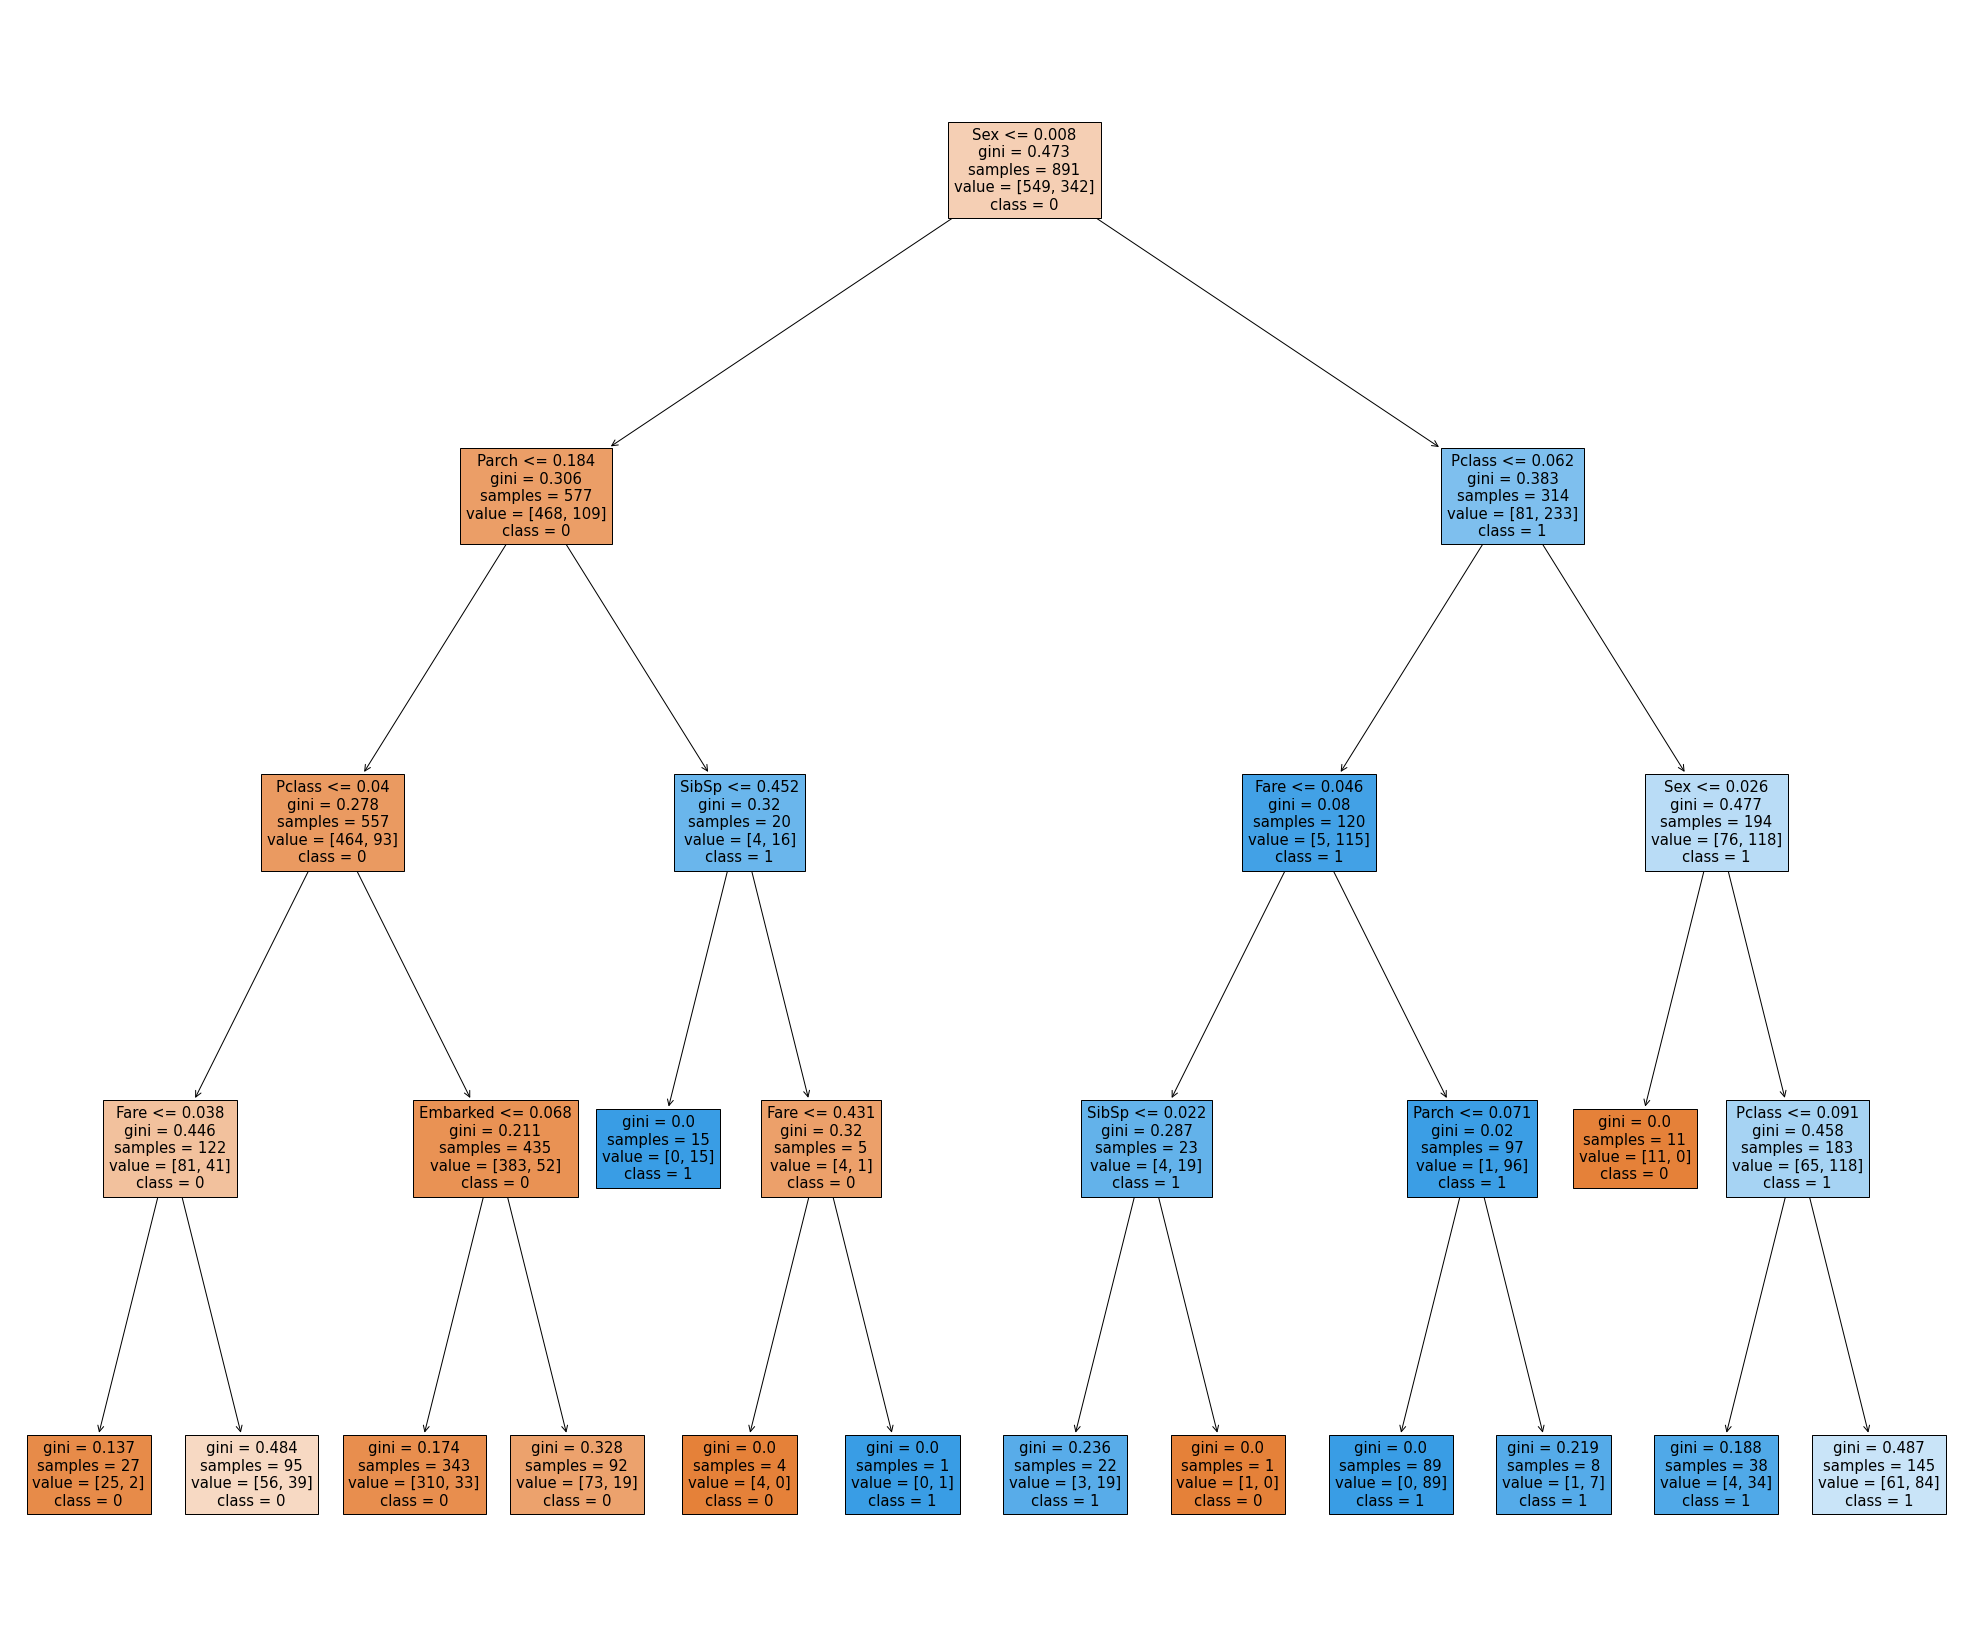

In [144]:
fig = plt.figure(figsize=(35,30))
dtree = tree.plot_tree(dtc, feature_names=titanic_train.columns[[0,2,3,4,5,6,7,8]], 
                       class_names=list(map(lambda x: str(x), dtc.classes_)), filled=True)

# Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 300, criterion='gini', max_depth=8, random_state = 0)
rfc_cv = cross_val_score(rfc, x_train_norm, y_train, cv=5)
rfc_cv.mean()

0.8182223338145753